In [13]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 14 09:54:28 2021

Applied Data Science assignment 3 -Clustering  using Indicator values of differnt countries

@author: Ifeoluwa
"""

import pandas as pd
import numpy as np
import sklearn.cluster as cluster

import matplotlib.pyplot as plt
%matplotlib inline



In [21]:
# reading all csv's
df_GDP = pd.read_csv("GDP.csv")
df_CO2 = pd.read_csv("CO2.csv")

In [33]:
# add columns with Elements
df_GDP["Element"] = "GDP"
df_CO2["Element"] = "CO2"


#merge both csv files. 
df_Whole_world = pd.concat([df_GDP, df_CO2])
df_Whole_world.head()


# sort and save as csv file
df_Whole_world = df_Whole_world.sort_values(["Country Name"])
df_Whole_world.to_csv("df_Whole_world.csv")

#Sort Files 
df_Whole_world = df_Whole_world.groupby("Element").sum()
df_Whole_world


#Transpose the dataframe
df_Whole_world = df_Whole_world.T
df_Whole_world.head()


Element,CO2,GDP
1960,7.703980e+07,0.000000
1961,7.630320e+07,151.709204
1962,7.859003e+07,333.552660
1963,8.311816e+07,325.531937
1964,8.770606e+07,496.100653


In [44]:
def norm(array):
    """ Returns array normalised to [0,1] """

    min_val = np.min(array)
    max_val = np.max(array)
    
    scaled = (array - min_val) / (max_val - min_val)
    
    return scaled


def norm_df(df):
    """ 
    Returns all columns of the dataframe normalised to [0,1] with the 
    exception the first (containing the names)
    Calls function norm to do the normalisation of one column, but
    doing all in one function is also fine. 
    """
    
    # iterate over all columns
    for col in df.columns[1:]:     # excluding the first column
        df[col] = norm(df[col])
        
    return df

In [46]:
# reading the file and basic statistics
df_Whole_world = pd.read_csv("df_Whole_world.csv", header=[0,1])
print(df_Whole_world.describe())
print(df_Whole_world.corr())
print()

# normalise result and inspect results
df_Whole_world = norm_df(df_Whole_world)
print(df_Whole_world.describe())
print()




      Unnamed: 0_level_0          1960          1961          1962  \
                       2       414.371       491.378       689.396   
count         531.000000  2.020000e+02  3.230000e+02  3.290000e+02   
mean          132.745763  3.813831e+05  2.362318e+05  2.388744e+05   
std            76.722271  1.216545e+06  9.769105e+05  1.002210e+06   
min             0.000000  1.100100e+01 -2.652764e+01 -2.164451e+01   
25%            66.500000  2.906098e+02  3.393326e+00  4.084845e+00   
50%           133.000000  3.604661e+03  1.650150e+02  1.356790e+02   
75%           199.000000  5.684543e+04  1.285834e+04  1.407761e+04   
max           265.000000  9.463838e+06  9.423934e+06  9.732506e+06   

               1963          1964          1965          1966          1967  \
            707.731       839.743      1008.425      1092.766       1283.45   
count  3.300000e+02  3.360000e+02  3.360000e+02  3.440000e+02  3.480000e+02   
mean   2.518721e+05  2.610289e+05  2.758883e+05  2.840536e+05 

TypeError: unsupported operand type(s) for -: 'str' and 'str'

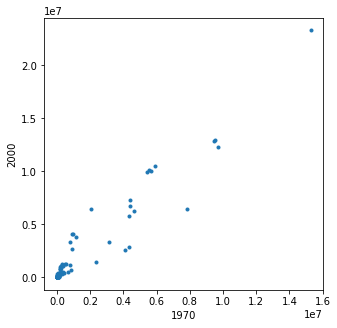

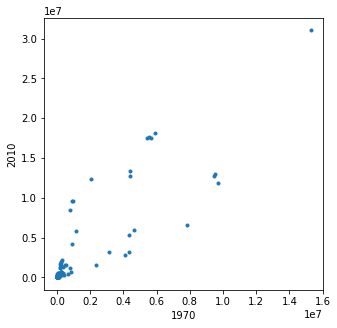

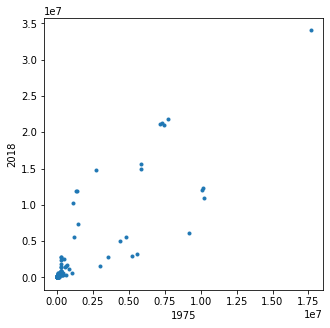

In [48]:
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    
# exploratory plots
makeplot(df_Whole_world, "1970", "2000")
makeplot(df_Whole_world, "1970", "2010")
makeplot(df_Whole_world, "1975", "2018")